<a href="https://colab.research.google.com/github/JangJiYeon12/AI-12/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd

train = pd.read_csv("/content/train.csv", index_col = 0) #index 생성
test = pd.read_csv("/content/test_x.csv", index_col = 0)
sub = pd.read_csv("/content/sample_submission.csv", index_col = 0)

In [47]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,1,1,0,1,1,1,1,0,1,1
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,1,1,0,1,1,1,1,0,1,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,1,1,0,1,1,0,1,0,1,1


In [ ]:
pip install category_encoders

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [48]:
target = 'voted'

train[target].value_counts(normalize=True)

2    0.546824
1    0.453176
Name: voted, dtype: float64

In [20]:
train.describe(exclude='number')

,age_group,gender,race,religion
count,45532,45532,45532,45532
unique,7,2,7,12
top,10s,Male,White,Atheist
freq,14215,24217,31248,10192


In [21]:
train.isnull().sum()

QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

In [49]:
#QaE-QtE (20개)를 삭제합니다.
dels = [col for col in train.columns if ('E' in col)]

train.drop(columns=dels, inplace=True)
test.drop(columns=dels, inplace=True)

In [50]:
train.shape

(45532, 57)

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [19]:
train.profile_report()

AttributeError: ignored

In [51]:
col = train.columns.drop(['age_group', 'gender', 'race', 'religion'])

train[col] = train[col].astype(int)

train

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3,4,5,1,2,5,2,4,5,4,...,0,1,0,1,1,0,1,0,1,1
1,5,5,3,5,1,3,1,1,5,3,...,1,1,0,1,1,0,1,0,1,1
2,4,1,1,4,5,1,4,1,3,2,...,1,1,0,1,1,1,1,0,1,1
3,3,3,4,3,1,2,4,3,5,4,...,0,0,0,0,1,0,1,0,1,1
4,1,1,5,2,1,2,1,1,5,5,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2,5,4,1,1,1,1,1,1,4,...,1,1,0,1,1,1,1,0,1,1
45528,2,3,4,1,3,2,2,1,2,5,...,1,1,0,1,1,1,1,0,1,1
45529,4,1,1,4,5,4,5,1,5,1,...,1,1,0,1,1,0,1,0,1,1


In [52]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)

In [23]:
train.dtypes

QaA            int64
QbA            int64
QcA            int64
QdA            int64
QeA            int64
QfA            int64
QgA            int64
QhA            int64
QiA            int64
QjA            int64
QkA            int64
QlA            int64
QmA            int64
QnA            int64
QoA            int64
QpA            int64
QqA            int64
QrA            int64
QsA            int64
QtA            int64
age_group     object
education      int64
engnat         int64
familysize     int64
gender        object
hand           int64
married        int64
race          object
religion      object
tp01           int64
tp02           int64
tp03           int64
tp04           int64
tp05           int64
tp06           int64
tp07           int64
tp08           int64
tp09           int64
tp10           int64
urban          int64
voted          int64
wf_01          int64
wf_02          int64
wf_03          int64
wr_01          int64
wr_02          int64
wr_03          int64
wr_04        

In [53]:
features = train.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = sub[target]

In [54]:
def encoding_one_hot(X_train, X_val, X_test):

    obj_col = ['engnat', 'gender', 'hand', 'married', 'race', 'religion', 'urban']
    ordi_col = ['age_group', 'education']

    pipe = make_pipeline(
        OneHotEncoder(cols=obj_col, use_cat_names = True),
        OrdinalEncoder(cols=ordi_col)
    )


    X_train_encoded = pipe.fit_transform(X_train)
    X_val_encoded = pipe.transform(X_val)
    X_test_encoded = pipe.transform(X_test)
    
    return X_train_encoded, X_val_encoded, X_test_encoded

In [55]:
X_train_encoded, X_val_encoded, X_test_encoded = encoding_one_hot(X_train, X_val, X_test)

In [56]:
X_train_encoded.shape

(36425, 85)

In [57]:
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)

pipe_lr.fit(X_train_encoded, y_train)

print('검증세트 정확도', pipe_lr.score(X_val_encoded, y_val))

검증세트 정확도 0.6535631931481278


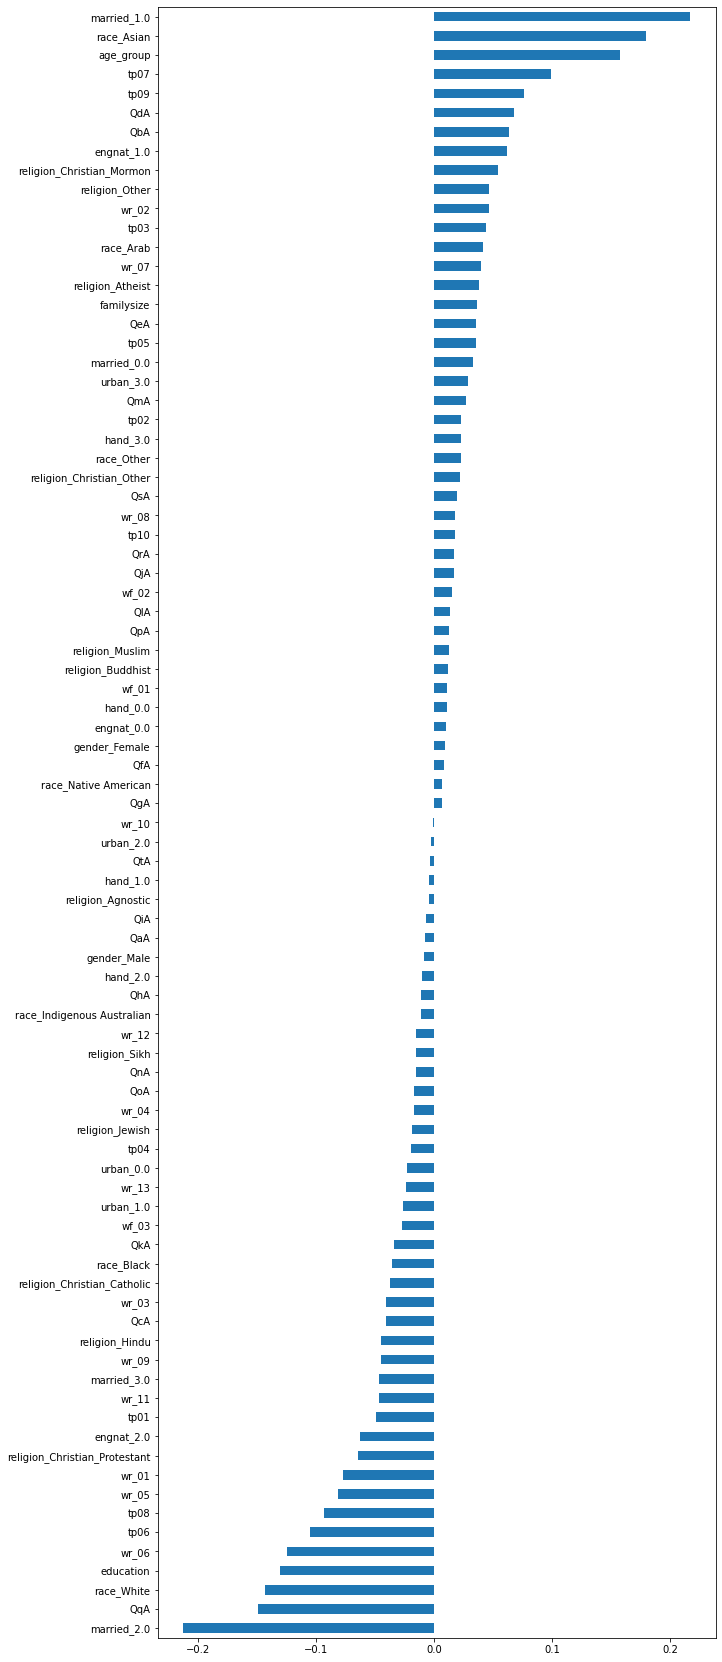

In [31]:
model_lr = pipe_lr.named_steps['logisticregression']
encoded_columns = X_val_encoded.columns
coefficients = pd.Series(model_lr.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh();

In [37]:
from sklearn.tree import DecisionTreeClassifier

pipe_dt = make_pipeline( 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe_dt.fit(X_train_encoded, y_train)
print('훈련 정확도', pipe_dt.score(X_train_encoded, y_train))
print('검증 정확도', pipe_dt.score(X_val_encoded, y_val))

훈련 정확도 0.6854358270418669
검증 정확도 0.6852970242670473


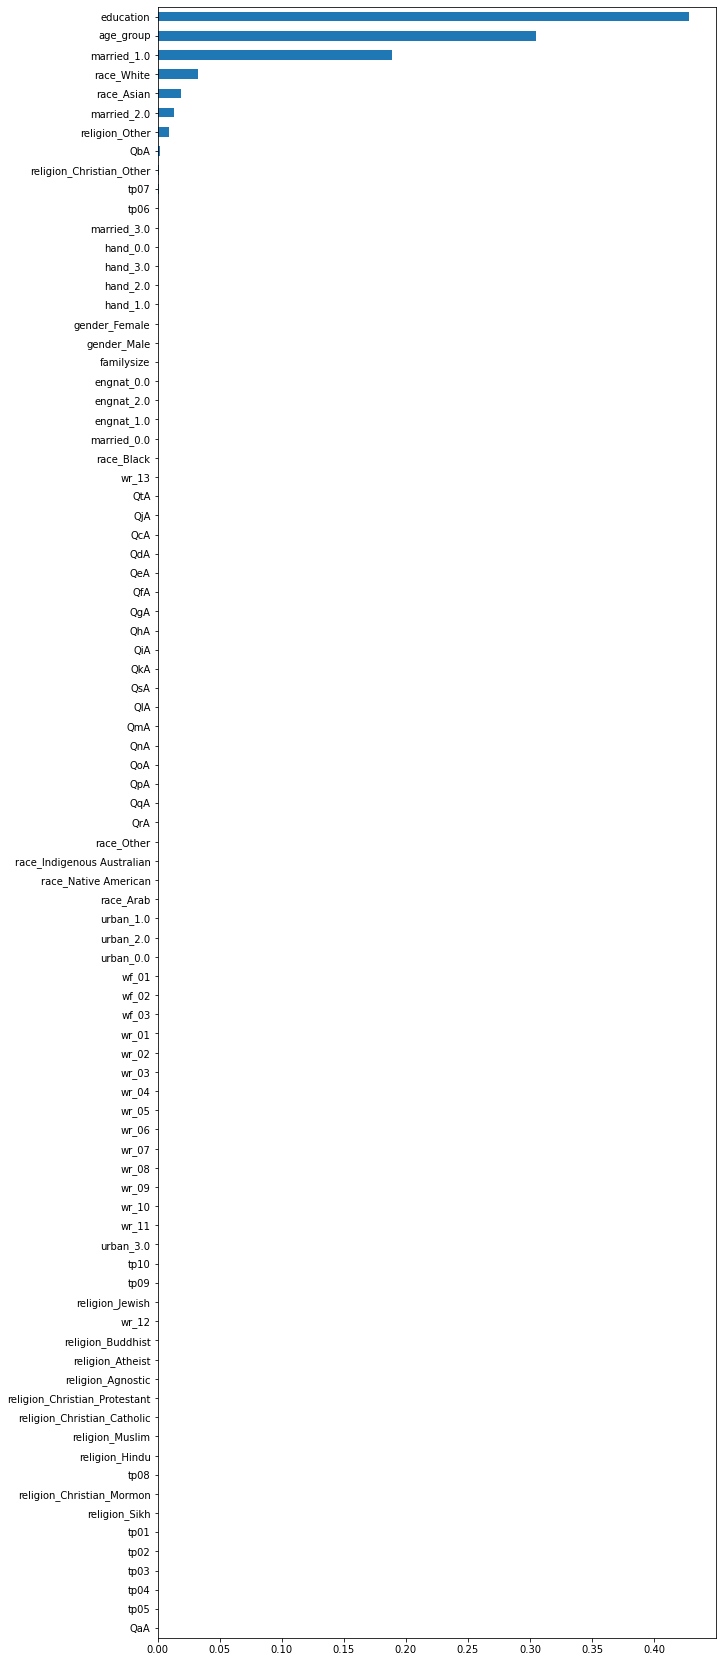

In [33]:
model_dt = pipe_dt.named_steps['decisiontreeclassifier']

importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh();

In [58]:
from sklearn.ensemble import RandomForestClassifier

pipe_rf = make_pipeline(
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_rf.fit(X_train_encoded, y_train)
print('검증 정확도: ', pipe_rf.score(X_val_encoded, y_val))

검증 정확도:  0.6883715822993302


In [59]:
from sklearn.model_selection import GridSearchCV

params = {
    'randomforestclassifier__n_estimators' : [10, 100],
    "randomforestclassifier__max_depth": [3, 5, None],
    "randomforestclassifier__max_features": [1, 3, 10],
    "randomforestclassifier__min_samples_split": [1, 3, 10],
    "randomforestclassifier__min_samples_leaf": [1, 3, 10],
}

rf_clf = make_pipeline(
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train_encoded, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
162 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-pac

최적 하이퍼 파라미터:  {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 100}
최고 예측 정확도: 0.6913


In [60]:
rf_clf1 = make_pipeline(
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, n_estimators=100, oob_score=True, criterion='entropy', max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3)
)
rf_clf1 = rf_clf1.fit(X_train_encoded, y_train)

In [61]:
pred = rf_clf1.predict(X_val_encoded)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_val,pred)))

예측 정확도: 0.6935


In [62]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

In [63]:
pip install pdpbox

     |████████████████████████████████| 34.0 MB 222 kB/s 
     |████████████████████████████████| 13.1 MB 23.9 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=e9e2fa56072778bf94e5dadaca1445d008a534c967ff132c3771231709a13213
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [64]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'education'

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


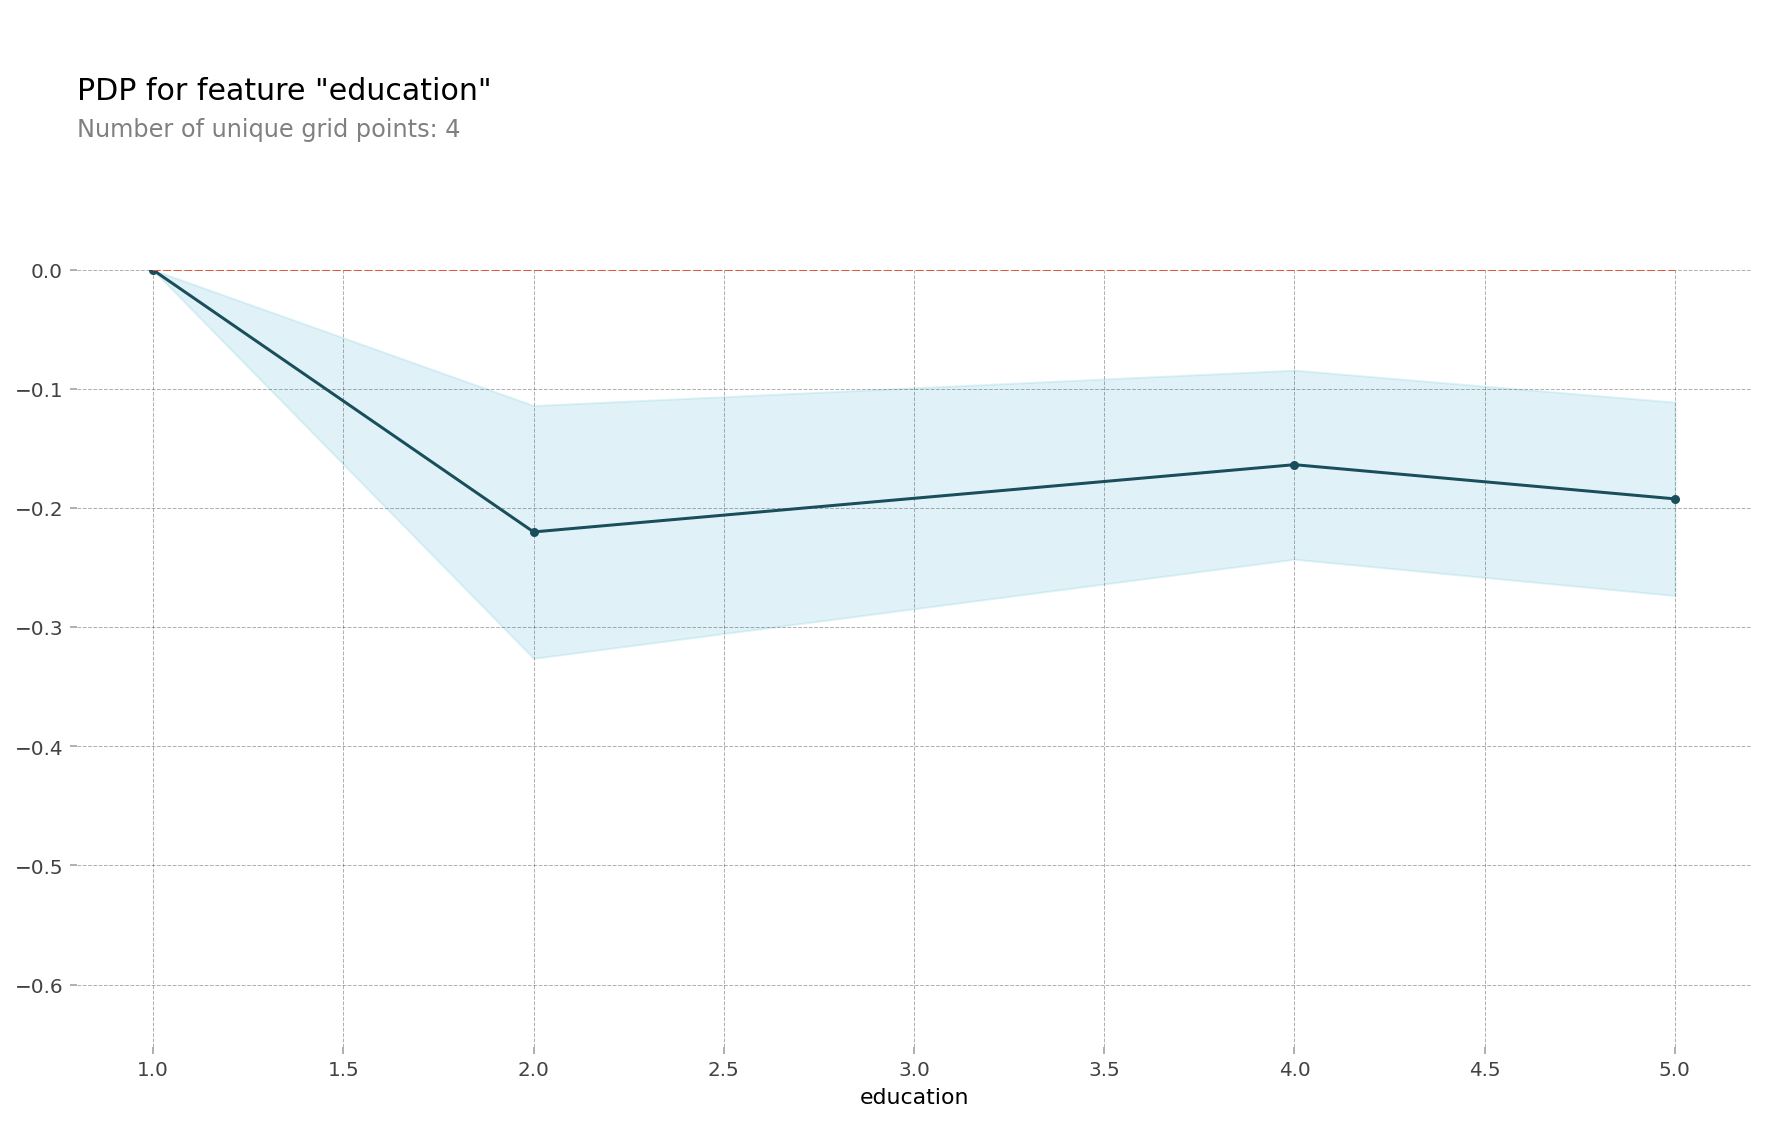

In [66]:
isolated = pdp_isolate(
    model=rf_clf1, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [67]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [ ]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train1) # 학습데이터
X_val_encoded = encoder.transform(X_val1) # 검증데이터

In [68]:
features = ['education', 'age_group']

interaction = pdp_interact(
    model=rf_clf1, 
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


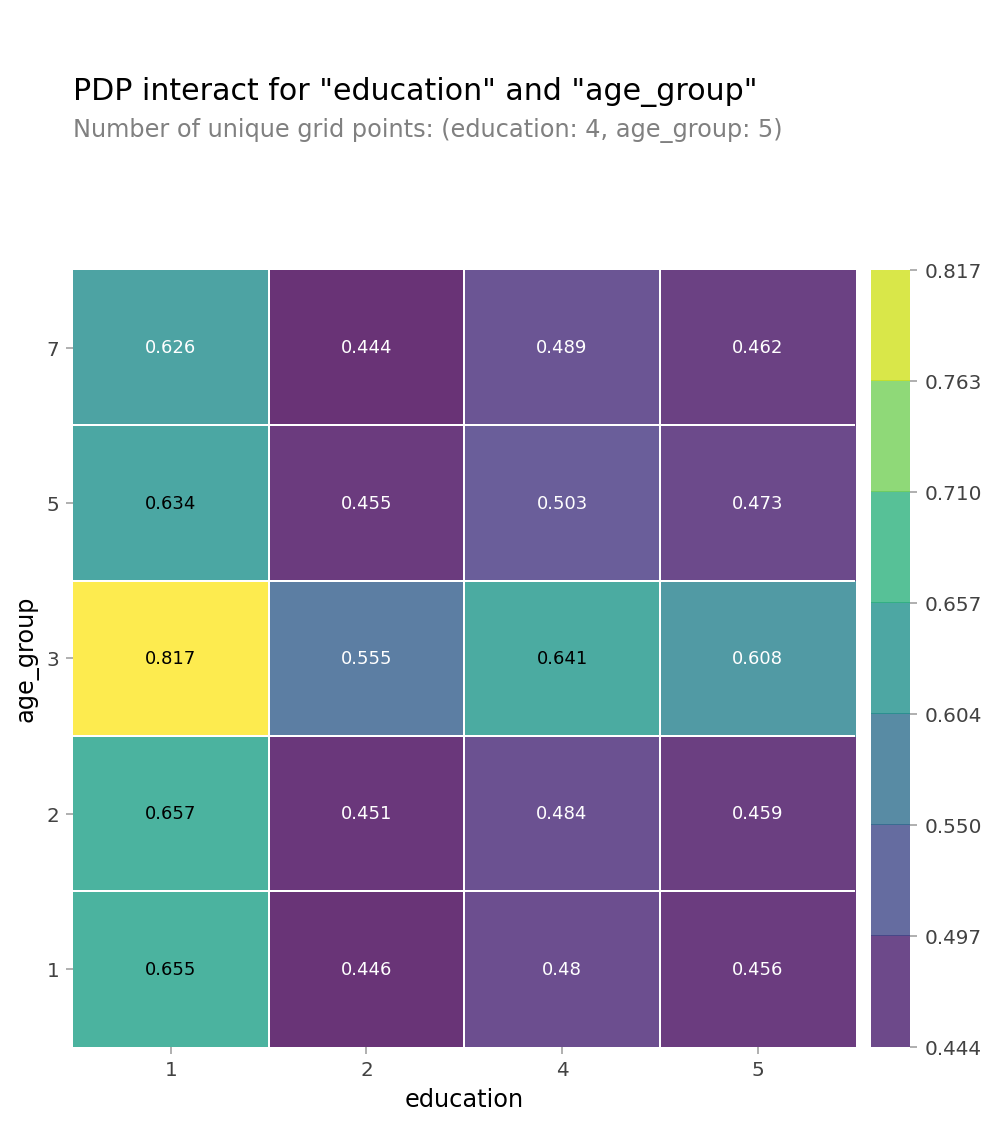

In [69]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);